# Letter_Recognition_Assignment

In [53]:
# Import required Libraries ...  


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

### Dataset import from Kaggle

In [54]:
dataset_1 = pd.read_csv("train.csv")


dataset_2 = pd.read_csv("test.csv")

### Data Understanding ...

-  Dimensions for Train and Test Datasets

In [55]:
dataset_1.shape

(42000, 785)

In [56]:
dataset_2.shape

(28000, 784)

#### Reading the columns of both the datasets

In [57]:
dataset_1.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [58]:
dataset_2.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

### Observation: test.csv doesn't have "Label" column so of no use for our analysis

### Distribution of Labels across the original dataset

In [59]:
dataset_1['label'].astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [60]:
order = list(np.sort(dataset_1['label'].unique()))

print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


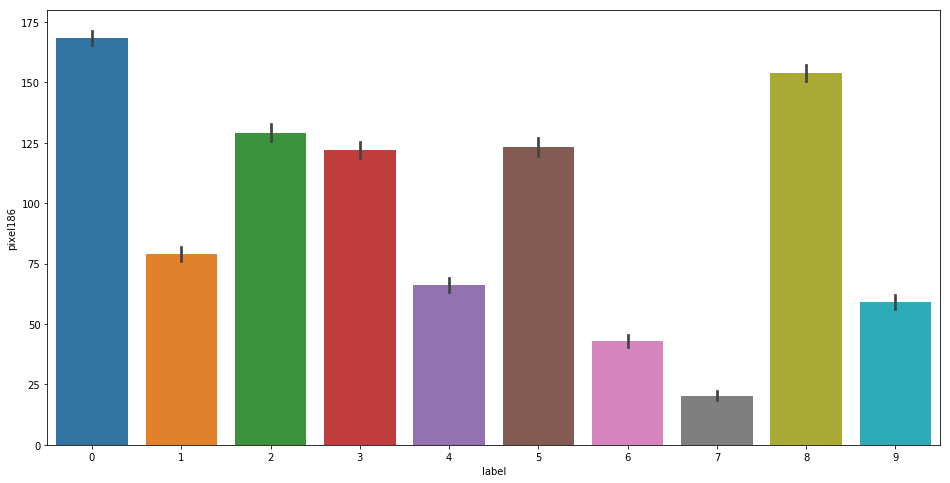

In [61]:
# Plot to show how the various attributes vary with the labels ...   


plt.figure(figsize = (16,8))


sns.barplot(x = 'label', y = 'pixel186', data = dataset_1, order = order)

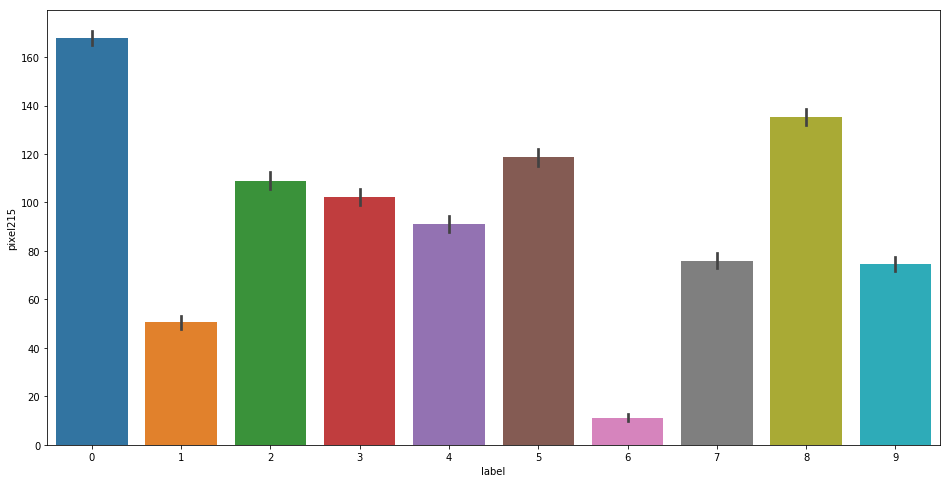

In [62]:
# Plot to show how the various attributes vary with the labels ...   


plt.figure(figsize = (16,8))


sns.barplot(x = 'label', y = 'pixel215', data = dataset_1, order = order)

### Finding the means across multiple labels in the dataset

In [63]:
label_means = dataset_1.groupby('label').mean()

label_means

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


### Checking for Missing Values in the dataset

In [65]:
round(100*(dataset_1.isnull().sum()/len(dataset_1.index)),2)

label       0.0
pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
pixel6      0.0
pixel7      0.0
pixel8      0.0
pixel9      0.0
pixel10     0.0
pixel11     0.0
pixel12     0.0
pixel13     0.0
pixel14     0.0
pixel15     0.0
pixel16     0.0
pixel17     0.0
pixel18     0.0
pixel19     0.0
pixel20     0.0
pixel21     0.0
pixel22     0.0
pixel23     0.0
pixel24     0.0
pixel25     0.0
pixel26     0.0
pixel27     0.0
pixel28     0.0
           ... 
pixel754    0.0
pixel755    0.0
pixel756    0.0
pixel757    0.0
pixel758    0.0
pixel759    0.0
pixel760    0.0
pixel761    0.0
pixel762    0.0
pixel763    0.0
pixel764    0.0
pixel765    0.0
pixel766    0.0
pixel767    0.0
pixel768    0.0
pixel769    0.0
pixel770    0.0
pixel771    0.0
pixel772    0.0
pixel773    0.0
pixel774    0.0
pixel775    0.0
pixel776    0.0
pixel777    0.0
pixel778    0.0
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 785, dtype: floa

### Data Preparation
-  Dividing the data into X and Y.
-  Dividing them further into train (20%) and test (80%) respectively.

#### Train Test Split :-   

In [66]:
x = dataset_1

y = dataset_1['label']

x.drop('label', axis = 1, inplace = True)

-  Train Test Split (20%) and (80%) respectively ...

In [67]:
x_scaled = scale(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.2, test_size = 0.8, random_state = 101)

C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [68]:
x_train.shape

(8400, 784)

In [69]:
x_test.shape

(33600, 784)

## Model Building

### Linear Model - Default Hyperparameters

In [70]:
model_linear = SVC(kernel='linear')




model_linear.fit(x_train, y_train)

# Predict labels now with the linear model with default hyperparameters ...    



y_pred = model_linear.predict(x_test)

In [71]:
# Confusion matrix and accuracy   

# accuracy of the model:
print("accuracy: ", metrics.accuracy_score(y_true = y_test, y_pred = y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

accuracy:  0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


### Non - Linear Model - Default Hyperparameters

In [72]:
model_nonlinear = SVC(kernel='rbf')




model_nonlinear.fit(x_train, y_train)

# Predict labels now with the non-linear model with default hyperparameters ...    



y_pred_nl = model_nonlinear.predict(x_test)

C:\Users\srath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [73]:
# Confusion matrix and accuracy   

# accuracy of the model:
print("accuracy: ", metrics.accuracy_score(y_true = y_test, y_pred = y_pred_nl), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_nl))

accuracy:  0.9396428571428571 

[[3195    0   19    5    4   11   32    4   14    1]
 [   0 3689   23   12    8    3    7    6    8    4]
 [  15   15 3144   29   31    5   18   37   43    6]
 [   5    8   92 3191    5   73    6   31   43   21]
 [   3    7   57    1 3099    9   19   21    7   67]
 [  15   10   37   66   16 2776   53   15   32   19]
 [  19    5   46    1   12   31 3149    2   12    0]
 [   6   21   66   11   25    3    0 3285    3   84]
 [  14   24   40   63   14   62   22   19 2996   18]
 [  12   10   38   40   80    6    0   97   24 3048]]


### Observation :
#### Comparison between Linear and Non Linear models with default hyperparameters
-  The non linear model gives 93.96% accuracy against the linear model which gives only 91.31%. So now we will proceed with the non linear model and find the suitable hyperparameters for better accuracy.

### Grid Search: Hyperparameter Tuning ...

In [38]:
# Creating KFold object with 5 splits

folds = KFold(n_splits= 5, shuffle=True, random_state= 101)




# Define the hyperparameters ...     
hyper_params = [{'gamma': [1e-4, 1e-5,1e-6],
                'C': [1,10,100,1000]}]



# building the model with these hyperparameters
model_hyp = SVC(kernel= "rbf")


# Set up GridSearchCV()


new_model_cv = GridSearchCV(estimator= model_hyp, param_grid= hyper_params, scoring='accuracy', cv = folds, verbose=1,
                       return_train_score= True)






new_model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 67.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.0001, 1e-05, 1e-06], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

#### Converting cv_results into a Dataframe

In [39]:
# CVResults   

cv_results = pd.DataFrame(new_model_cv.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,29.163364,0.902893,7.961982,0.177569,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,9,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
1,72.675473,0.440748,11.733446,0.410269,1,1e-05,"{'C': 1, 'gamma': 1e-05}",0.752381,0.729167,0.747619,...,0.739643,0.009008,11,0.756399,0.743006,0.742560,0.761756,0.743750,0.749494,0.008015
2,89.272624,1.922018,11.831225,0.099846,1,1e-06,"{'C': 1, 'gamma': 1e-06}",0.116071,0.109524,0.117857,...,0.110000,0.006770,12,0.108482,0.110119,0.108036,0.111012,0.112798,0.110089,0.001731
3,13.396546,0.159920,4.920968,0.029426,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,1,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
4,28.234821,0.267208,7.744910,0.070542,10,1e-05,"{'C': 10, 'gamma': 1e-05}",0.911905,0.908929,0.908929,...,0.904405,0.006907,7,0.916071,0.916518,0.916220,0.921429,0.919196,0.917887,0.002107
5,71.574493,0.707365,11.342463,0.059048,10,1e-06,"{'C': 10, 'gamma': 1e-06}",0.754167,0.731548,0.748214,...,0.741190,0.008784,10,0.758036,0.743155,0.744196,0.762798,0.746280,0.750893,0.007984
6,10.041265,0.124146,4.105840,0.046151,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,4,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645
7,12.809576,0.162356,4.787287,0.050182,100,1e-05,"{'C': 100, 'gamma': 1e-05}",0.930357,0.923214,0.929762,...,0.926667,0.002877,2,0.954911,0.956399,0.955208,0.954911,0.956548,0.955595,0.000727
8,28.236004,0.117634,7.753720,0.072765,100,1e-06,"{'C': 100, 'gamma': 1e-06}",0.911310,0.907738,0.908929,...,0.904286,0.006349,8,0.916071,0.916369,0.916220,0.921280,0.919048,0.917798,0.002059
9,9.999486,0.100914,4.024052,0.044047,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.921429,0.920238,0.924405,...,0.920357,0.002877,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


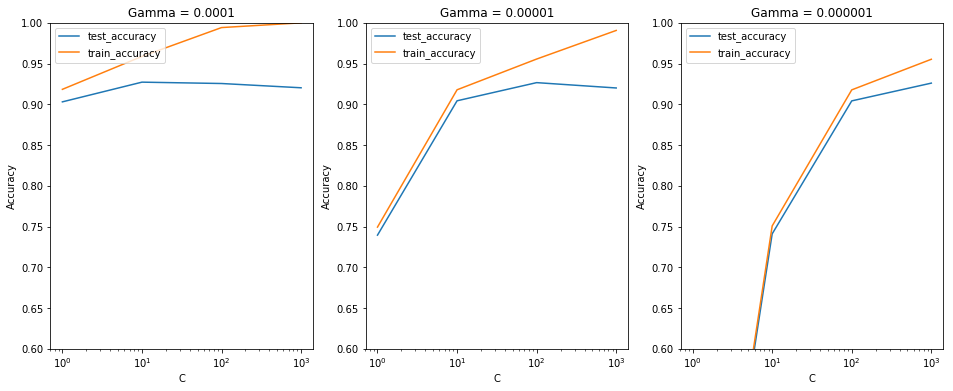

In [42]:
# Converting C to numeric type for plotting on x-axis

cv_results['param_C'] = cv_results['param_C'].astype('int')

# Plotting 
plt.figure(figsize = (16,6))

# Subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma'] == 0.0001]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma = 0.0001")
plt.ylim([0.60, 1])
plt.legend(['test_accuracy', 'train_accuracy'], loc = 'upper left')
plt.xscale('log')


# Subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma'] == 0.00001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma = 0.00001")
plt.ylim([0.60, 1])
plt.legend(['test_accuracy', 'train_accuracy'], loc = 'upper left')
plt.xscale('log')



# Subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma'] == 0.000001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma = 0.000001")
plt.ylim([0.60, 1])
plt.legend(['test_accuracy', 'train_accuracy'], loc = 'upper left')
plt.xscale('log')

### Optimal Accuracy score and Hyperparameters ....

In [43]:
# Best score and best hyperparameters



best_score = new_model_cv.best_score_




best_hyperparams = new_model_cv.best_params_





print("The best Test score is {0} corresponding to hyperparameters  {1}".format(best_score, best_hyperparams))

The best Test score is 0.9272619047619047 corresponding to hyperparameters  {'C': 10, 'gamma': 0.0001}


### Building and Evaluating the Final Model with optimal hyperparameters

In [44]:
final_model = SVC(C = 10, gamma = 0.0001, kernel= "rbf")

final_model.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
y_pred_final = final_model.predict(x_test)

In [48]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred_final), "\n")
#print("Precision : ",metrics.precision_score(y_test, y_pred_final), "\n")
#print("Recall/Sensitivity : ",metrics.recall_score(y_test, y_pred_final), "\n")




print(metrics.confusion_matrix(y_test, y_pred_final), "\n")

Accuracy :  0.9313690476190476 

[[3208    0    8    4    9   13   24    3   16    0]
 [   0 3685   18   17    4    7    5    8   13    3]
 [  27   20 3068   27   55    5   28   36   67   10]
 [  13   14   88 3128    4  111    7   29   55   26]
 [   7    8   26    1 3101    7   20    7    4  109]
 [  26   30   13   97   25 2718   45   12   50   23]
 [  29    8   27    1   15   38 3143    2   14    0]
 [   5   25   36   10   27    8    2 3291    8   92]
 [  10   48   27   82   25   90   22   14 2934   20]
 [  19   14    8   46  108    9    0  107   26 3018]] 



### Classwise metrics calculation
-  I need to understand how the different classes are contributing for this 93% accuracy score of the model.

In [49]:
from sklearn.metrics import classification_report


classwise_metrics = classification_report(y_true = y_test, y_pred = y_pred_final)

In [50]:
print(classwise_metrics)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3285
           1       0.96      0.98      0.97      3760
           2       0.92      0.92      0.92      3343
           3       0.92      0.90      0.91      3475
           4       0.92      0.94      0.93      3290
           5       0.90      0.89      0.90      3039
           6       0.95      0.96      0.96      3277
           7       0.94      0.94      0.94      3504
           8       0.92      0.90      0.91      3272
           9       0.91      0.90      0.91      3355

   micro avg       0.93      0.93      0.93     33600
   macro avg       0.93      0.93      0.93     33600
weighted avg       0.93      0.93      0.93     33600



##     **   THANK YOU    ** 